In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#library for understanding music
from music21 import *

import random
from keras.layers import *
from keras.models import *
from keras.callbacks import *
import keras.backend as K
from keras.models import load_model

import os
#Array Processing
import numpy as np

from collections import Counter
#library for visualiation
import matplotlib.pyplot as plt

In [3]:
# function to parse MIDI files

def read_midiFile(file, fileName):
    
    print(fileName)
    notes_list=[]
    notes_list_to_parse = None
    
    #parsing a midi file
    midiFile = converter.parse(file)
  
    #grouping based on different instruments
    pianoGroup = instrument.partitionByInstrument(midiFile)

    #Looping over all the instruments
    for instr in pianoGroup.parts:
    
        #select elements of only piano
        if 'Piano' in str(instr): 
        
            notes_list_to_parse = instr.recurse() 
      
            #finding whether a particular element is note or a chord
            for element in notes_list_to_parse:
                
                #note
                if isinstance(element, note.Note):
                    notes_list.append(str(element.pitch))
                
                #chord
                elif isinstance(element, chord.Chord):
                    notes_list.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes_list)

In [4]:
#loading the dataset
#specifying the path
path="/content/drive/My Drive/Minor /dataset/"

#read all the filenames
filenames=[i for i in os.listdir(path) if i.endswith(".mid")]
print("Loading Music Files: ")
#reading MIDI files
notes_list_array = np.array([read_midiFile((path+i), i) for i in filenames])

Loading Music Files: 
schubert_D850_1.mid
schubert_D850_2.mid
schubert_D850_3.mid
schubert_D850_4.mid
schub_d760_1.mid
schub_d760_2.mid
schub_d760_3.mid
schub_d760_4.mid
schumm-1.mid
schumm-2.mid
schumm-3.mid
schumm-4.mid
schumm-5.mid
schumm-6.mid
schu_143_1.mid
schu_143_2.mid
schu_143_3.mid
schuim-1.mid
schuim-2.mid
schuim-3.mid
schuim-4.mid
schubert_D935_1.mid
schubert_D935_2.mid
schubert_D935_3.mid
schubert_D935_4.mid
schub_d960_1.mid
schub_d960_2.mid
schub_d960_3.mid
schub_d960_4.mid


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if __name__ == '__main__':


In [5]:
print(notes_list_array)

[array(['2.6.9', '2', '9.2', ..., '2.6.9', '2.6.9', '9.2'], dtype='<U8')
 array(['1.4', '4.9', '2.6', ..., '9.1.4', '9.1.4', '9.1.4'], dtype='<U8')
 array(['7.9.1', '9', '7.9.1', ..., '9.2', '2.6.9', '9.2'], dtype='<U8')
 array(['2.6', '6.9', '2.6', ..., 'A2', '2.6', '9.2'], dtype='<U8')
 array(['0.4.7', '7.0', '0.4.7', ..., '6.9', '0.3', '6.8'], dtype='<U8')
 array(['1.4.8', '1.4.8', '1.4.8', ..., 'E3', 'G#2', 'E3'], dtype='<U8')
 array(['G4', 'G3', 'G#4', ..., '7', '7.11.2', '7.11.2'], dtype='<U8')
 array(['0', '0', '0', ..., '0.4.7', '0.4.7', '0.4.7'], dtype='<U8')
 array(['G4', 'G3', 'A4', ..., '5.7', '0', '0.4.7'], dtype='<U6')
 array(['8.0', '3.8', '1.7', ..., '8.0.3', '3.8', '8.0.3'], dtype='<U7')
 array(['F3', '0.5', 'F3', '0.5', 'F3', '0.5', 'F3', '0.5', 'B-4', 'G#4',
       'F3', 'G#4', '0.5', 'B-4', 'G#4', 'F3', 'G4', '0.4', 'G#4', 'B-4',
       '8.0', 'F3', '0.5', 'G#4', 'B-4', '8.0', 'F3', '0.5', 'B-4', 'G#4',
       'F3', 'G#4', '0.5', 'B-4', 'G#4', 'F3', '7.0', '0.4', 'C

In [6]:
#converting 2D array into 1D array
notes_list_ = [element for note_ in notes_list_array for element in note_]

#No. of unique notes
unique_notes_list = list(set(notes_list_))
print(len(unique_notes_list))

304


In [7]:
#computing frequency of each note
frequency = dict(Counter(notes_list_))
print(frequency)

{'2.6.9': 329, '2': 446, '9.2': 251, '2.6': 458, 'A3': 986, 'D4': 916, 'F#2': 356, 'D3': 808, '11.4': 279, '4.7': 296, '0.2.6': 61, '0.6': 65, '6.9': 373, '7.11': 196, 'E4': 1306, 'E3': 772, 'G4': 1008, 'G3': 1199, 'F#4': 979, 'F#3': 745, 'B-4': 950, 'B-3': 1145, 'A4': 1154, 'F#5': 565, 'E5': 988, 'D5': 1000, 'A5': 766, 'G5': 800, 'C#4': 1202, 'C#5': 1172, '2.5.9': 75, '2.5': 212, 'F2': 581, '4.10': 67, '7.10': 262, '2.5.8': 37, '5.8.11': 83, '5.9.0': 266, 'C5': 1395, 'C3': 953, 'F4': 1002, 'C4': 1085, 'A2': 666, 'F3': 840, 'B-2': 539, 'G2': 573, 'A1': 175, 'B-1': 111, 'C2': 281, '1.5.8': 184, 'C#2': 304, '1': 329, '1.4.7.9': 31, '9': 489, 'B3': 998, 'B2': 606, '4.7.9': 77, '7.9.1': 84, '4.9': 393, '9.1': 302, '11.2': 367, 'B4': 993, 'E-4': 1334, 'E-3': 1002, '7.10.1': 111, '10.1.4': 44, '1.7': 175, '1.4': 326, 'E-5': 1045, '1.4.7.10': 76, '10': 356, '1.4.7': 50, '3.7': 122, 'F5': 783, 'C#3': 749, 'E2': 503, 'G#4': 1470, 'G#2': 635, 'B1': 153, 'G#5': 813, '9.1.4': 237, '0.3': 394, 'C#6

(array([187.,  41.,  26.,  11.,   6.,   9.,  12.,   6.,   3.,   3.]),
 array([1.0000e+00, 1.4790e+02, 2.9480e+02, 4.4170e+02, 5.8860e+02,
        7.3550e+02, 8.8240e+02, 1.0293e+03, 1.1762e+03, 1.3231e+03,
        1.4700e+03]),
 <a list of 10 Patch objects>)

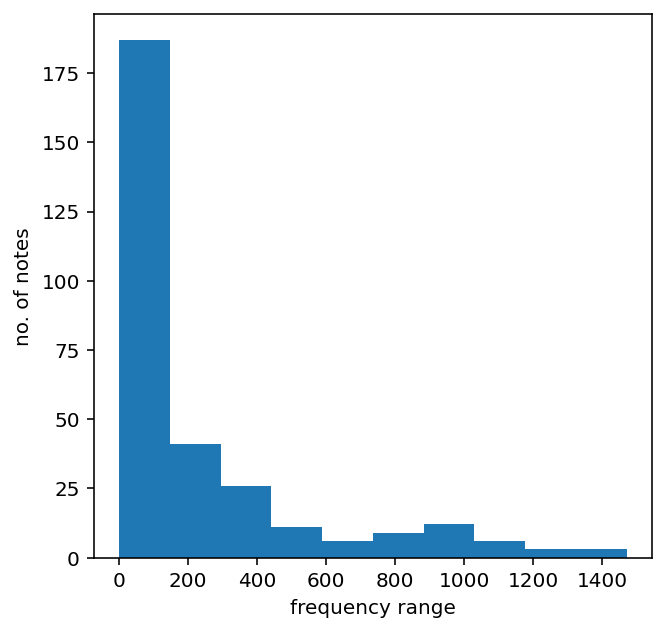

In [8]:
#consider only the frequencies
no=[count for _,count in frequency.items()]

#set the figure size
plt.figure(figsize=(5,5))
plt.xlabel("frequency range")
plt.ylabel("no. of notes")
#plot
plt.hist(no)

In [9]:
#defining threshold for extracting frequent notes
frequent_notes_list = [note for note, count in frequency.items() if count>=40]
print(len(frequent_notes_list))

177


In [10]:
#selecting notes from MIDI file which satisfy the threshold
generated_music=[]

for notes_list in notes_list_array:
    temp=[]
    for note_ in notes_list:
        if note_ in frequent_notes_list:
            temp.append(note_)            
    generated_music.append(temp)
    
generated_music = np.array(generated_music)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


In [11]:
print(generated_music)

[list(['2.6.9', '2', '9.2', '2.6', '9.2', '2.6', '9.2', '2.6', '9.2', '2.6', 'A3', 'D4', 'F#2', 'D3', '11.4', '4.7', '0.2.6', '2.6.9', '0.2.6', '2.6.9', '0.2.6', '2.6.9', '0.2.6', '2.6.9', '0.6', 'D4', 'D3', '6.9', '7.11', '7.11', 'E4', 'E3', 'G4', 'G3', 'F#4', 'F#3', 'E4', 'E3', 'B-4', 'B-3', 'A4', 'A3', 'G4', 'G3', 'A4', 'A3', 'F#5', 'D4', 'E5', 'E4', 'D5', 'F#4', 'A5', 'A3', 'G5', 'C#4', 'F#5', 'D4', 'E5', 'E4', 'D5', 'F#4', 'C#5', 'G4', '2.5.9', '2', '9.2', '2.5', '9.2', '2.5', '9.2', '2.5', '9.2', '2.5', 'A3', 'D4', 'F2', 'D3', '4.10', '4.7', '0.2.6', '2.6.9', '0.2.6', '2.6.9', '0.2.6', '2.6.9', '0.2.6', '2.6.9', '0.6', 'D4', 'D3', '6.9', '7.10', '7.10', '5.8.11', '5.8.11', '5.8.11', '5.8.11', '5.9.0', '5.9.0', 'C5', 'B-4', 'A4', 'G4', 'C3', 'F4', 'C3', 'E4', 'D4', 'C3', 'C4', 'C3', 'B-3', 'A3', 'C3', 'B-3', 'C4', 'C5', 'A2', 'B-4', 'A4', 'G4', 'C3', 'F4', 'C3', 'E4', 'D4', 'C3', 'C4', 'C3', 'B-3', 'A3', 'C3', 'B-3', 'C4', 'A3', 'B-3', 'C4', 'A3', 'F3', 'B-3', 'G3', 'C4', 'A3', 'A

In [12]:
#defining timesteps to split each MIDI file into sequences
num_timesteps = 64 
x = []
y = []

for note_ in generated_music:
    for i in range(0, len(note_) - num_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + num_timesteps] # 0 to 63
        output = note_[i + num_timesteps] # 64
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [13]:
print(x)

[['2.6.9' '2' '9.2' ... 'F#4' 'C#5' 'G4']
 ['2' '9.2' '2.6' ... 'C#5' 'G4' '2.5.9']
 ['9.2' '2.6' '9.2' ... 'G4' '2.5.9' '2']
 ...
 ['0.4.7' 'C3' 'C6' ... 'C#2' 'C2' 'B-1']
 ['C3' 'C6' 'C4' ... 'C2' 'B-1' 'G#1']
 ['C6' 'C4' '5.8.0' ... 'B-1' 'G#1' 'G1']]


In [14]:
print(y)

['2.5.9' '2' '9.2' ... 'G#1' 'G1' 'F1']


In [15]:
#identifying unique notes in input
unique_x = list(set(x.ravel()))
#encoding unique input notes
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [16]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [17]:
print(len(x_seq))
print(x_seq)

64063
[[ 35  64 131 ... 155  43 167]
 [ 64 131 120 ...  43 167 159]
 [131 120 131 ... 167 159  64]
 ...
 [168  14 141 ...  99 127  26]
 [ 14 141  20 ... 127  26 106]
 [141  20 140 ...  26 106 143]]


In [18]:
#identifying unique notes in output
unique_y = list(set(y))
#encoding unique output notes
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [19]:
print(len(y_seq))
print(y_seq)

64063
[159  64 131 ... 106 143  27]


In [20]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

WAVENET

In [21]:
K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=64,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 64, 100)           17700     
_________________________________________________________________
conv1d (Conv1D)              (None, 64, 64)            19264     
_________________________________________________________________
dropout (Dropout)            (None, 64, 64)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 32, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 32, 128)           24704     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 128)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 16, 128)           0

In [22]:
mc=ModelCheckpoint('best_modelkeras.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [23]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=50, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc])

Epoch 1/50
401/401 [==============================] - 38s 19ms/step - loss: 4.6717 - accuracy: 0.0303 - val_loss: 4.1909 - val_accuracy: 0.0722

Epoch 00001: val_loss improved from inf to 4.19092, saving model to best_modelkeras.h5
Epoch 2/50
401/401 [==============================] - 7s 17ms/step - loss: 3.9692 - accuracy: 0.0859 - val_loss: 3.9570 - val_accuracy: 0.1023

Epoch 00002: val_loss improved from 4.19092 to 3.95697, saving model to best_modelkeras.h5
Epoch 3/50
401/401 [==============================] - 7s 17ms/step - loss: 3.7593 - accuracy: 0.1076 - val_loss: 3.8763 - val_accuracy: 0.1163

Epoch 00003: val_loss improved from 3.95697 to 3.87626, saving model to best_modelkeras.h5
Epoch 4/50
401/401 [==============================] - 7s 17ms/step - loss: 3.5962 - accuracy: 0.1250 - val_loss: 3.6787 - val_accuracy: 0.1247

Epoch 00004: val_loss improved from 3.87626 to 3.67870, saving model to best_modelkeras.h5
Epoch 5/50
401/401 [==============================] - 7s 17ms/s

In [24]:
#loading best model
model = load_model('best_modelkeras.h5')

In [25]:
def plot_graph_loss(history):
  for label in ["loss"]:
    plt.plot(history.history[label],label=label)
  for label in ["val_loss"]:
    plt.plot(history.history[label],label=label)
  plt.legend()
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.show()

In [26]:
def plot_graph_acc(history):
  for label in ["accuracy"]:
    plt.plot(history.history[label],label=label)
  for label in ["val_accuracy"]:
    plt.plot(history.history[label],label=label)
  plt.legend()
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.show()

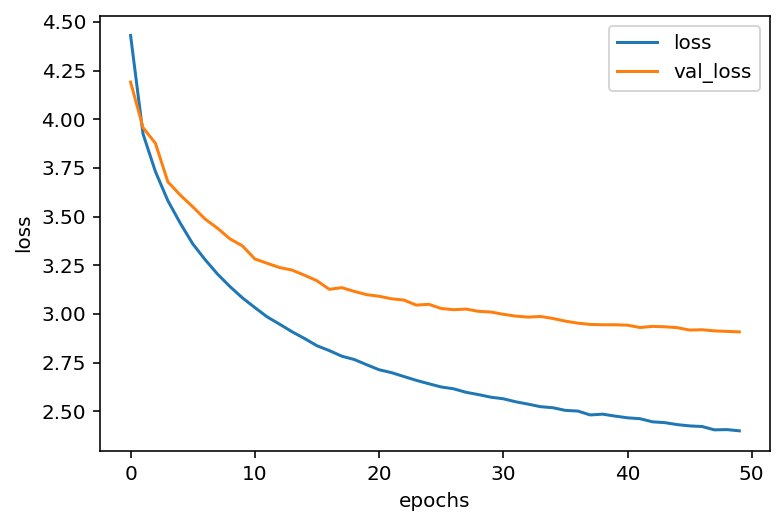

In [27]:
plot_graph_loss(history)  

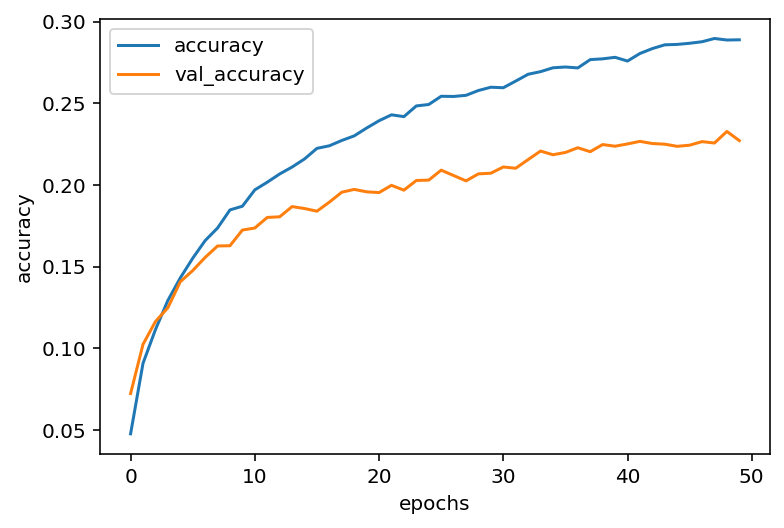

In [28]:
plot_graph_acc(history)

In [29]:
val_loss=history.history['val_loss']
accuracy=history.history['accuracy']
loss=history.history['loss']
val_accuracy=history.history['val_accuracy']

val_loss_min=min(val_loss)
epoch=val_loss.index(val_loss_min)
acc=accuracy[epoch]
train_loss=loss[epoch]
val_acc=val_accuracy[epoch]

print("Training Set Accuracy: ", acc*100)
print("Training Set Loss: ", train_loss)
print("Validation Set Accuracy: ", val_acc*100)
print("Validation Set Loss: ", val_loss_min)

Training Set Accuracy:  28.88585329055786
Training Set Loss:  2.3996119499206543
Validation Set Accuracy:  22.711308300495148
Validation Set Loss:  2.907806396484375


In [30]:
#predicting new music notes
index = np.random.randint(0,len(x_val)-1)
#selecting a input sequence from validation set
output_music = x_val[index]

predictions=[]
for i in range(20):

    output_music = output_music.reshape(1,num_timesteps)

    probability  = model.predict(output_music)[0]
    y_prediction= np.argmax(probability,axis=0)
    predictions.append(y_prediction)

    output_music = np.insert(output_music[0],len(output_music[0]),y_prediction)
    output_music = output_music[1:]
    
print(predictions)

[11, 63, 63, 11, 11, 63, 63, 39, 25, 34, 25, 39, 18, 39, 25, 18, 162, 63, 49, 18]


In [31]:
#converting integer predictions to corresponding notes
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes_list = [x_int_to_note[i] for i in predictions]

In [32]:
#creating midi file for the predicted notes
def convert_to_midiFile(prediction_output):
   
    offset = 0
    output_notes_list = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_list_in_chord = pattern.split('.')
            notes_list = []
            for cur_note in notes_list_in_chord:
                
                cn=int(cur_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes_list.append(new_note )
                
            new_chord = chord.Chord(notes_list)
            new_chord.offset = offset
            output_notes_list.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes_list.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    
    midiFile_stream = stream.Stream(output_notes_list)
    midiFile_stream.write('midi', fp='thresh50time32wavenet.mid')

In [33]:
convert_to_midiFile(predicted_notes_list)

LSTM

In [34]:
n_vocabulary=len(unique_y)
model1 = Sequential()
model1.add(Embedding(len(unique_x), 100, input_length=64,trainable=True)) 
model1.add(LSTM(128,return_sequences=True))
model1.add(LSTM(128))
model1.add(Dense(256))
model1.add(Activation('relu'))
model1.add(Dense(n_vocabulary))
model1.add(Activation('softmax'))
model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 64, 100)           17700     
_________________________________________________________________
lstm (LSTM)                  (None, 64, 128)           117248    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 177)               45489     
_________________________________________________________________
activation_1 (Activation)    (None, 177)              

In [35]:
mc1=ModelCheckpoint('best_modellstm.h5', monitor='val_loss', mode='min', save_best_only=True,verbose=1)

In [36]:
history1 = model1.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=25, validation_data=(np.array(x_val),np.array(y_val)),verbose=1, callbacks=[mc1])

Epoch 1/25
401/401 [==============================] - 19s 39ms/step - loss: 4.5516 - accuracy: 0.0408 - val_loss: 3.8755 - val_accuracy: 0.0930

Epoch 00001: val_loss improved from inf to 3.87554, saving model to best_modellstm.h5
Epoch 2/25
401/401 [==============================] - 15s 37ms/step - loss: 3.7799 - accuracy: 0.1065 - val_loss: 3.6434 - val_accuracy: 0.1288

Epoch 00002: val_loss improved from 3.87554 to 3.64336, saving model to best_modellstm.h5
Epoch 3/25
401/401 [==============================] - 15s 37ms/step - loss: 3.5253 - accuracy: 0.1403 - val_loss: 3.4949 - val_accuracy: 0.1410

Epoch 00003: val_loss improved from 3.64336 to 3.49490, saving model to best_modellstm.h5
Epoch 4/25
401/401 [==============================] - 15s 37ms/step - loss: 3.3553 - accuracy: 0.1537 - val_loss: 3.3778 - val_accuracy: 0.1586

Epoch 00004: val_loss improved from 3.49490 to 3.37785, saving model to best_modellstm.h5
Epoch 5/25
401/401 [==============================] - 15s 37ms/s

In [37]:
model1 = load_model('best_modellstm.h5')

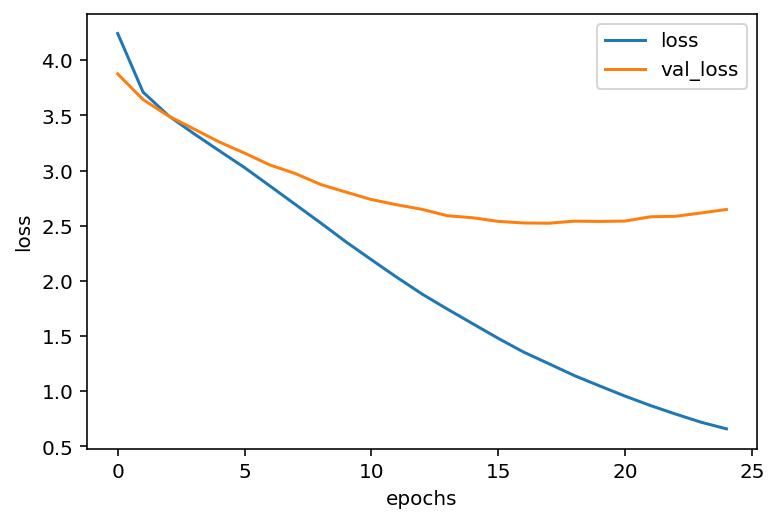

In [38]:
plot_graph_loss(history1)

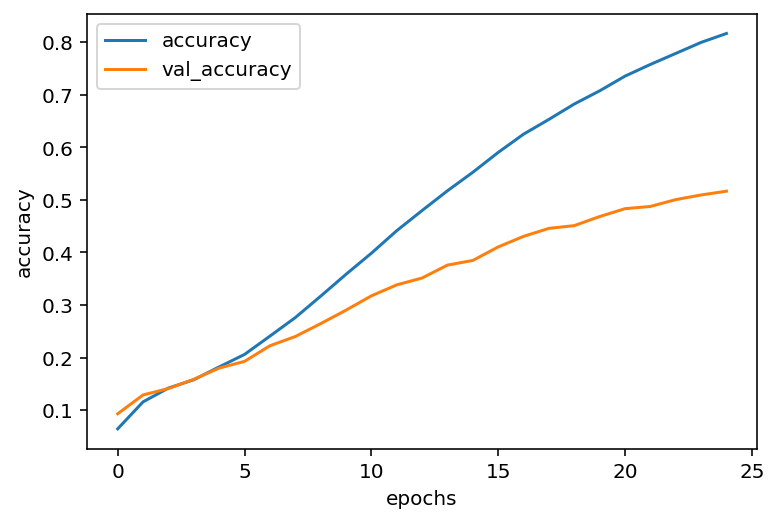

In [39]:
plot_graph_acc(history1)

In [40]:
val_loss1=history1.history['val_loss']
accuracy1=history1.history['accuracy']
loss1=history1.history['loss']
val_accuracy1=history1.history['val_accuracy']

val_loss_min1=min(val_loss1)
epoch1=val_loss1.index(val_loss_min1) 
acc1=accuracy1[epoch1]
train_loss1=loss1[epoch1]
val_acc1=val_accuracy1[epoch1]

print("Training Set Accuracy: ", acc1*100)
print("Training Set Loss: ", train_loss1)
print("Validation Set Accuracy: ", val_acc1*100)
print("Validation Set Loss: ", val_loss_min1)

Training Set Accuracy:  65.32097458839417
Training Set Loss:  1.2495399713516235
Validation Set Accuracy:  44.579723477363586
Validation Set Loss:  2.5228843688964844


In [41]:
#predicting new music notes
index1 = np.random.randint(0,len(x_val)-1)
#selecting a input sequence from validation set
output_music1 = x_val[index1]

predictions1=[]
for i in range(20):

    output_music1 = output_music1.reshape(1,num_timesteps)

    probability1  = model1.predict(output_music1)[0]
    y_prediction1 = np.argmax(probability1,axis=0)
    predictions1.append(y_prediction1)

    output_music1 = np.insert(output_music1[0],len(output_music1[0]),y_prediction1)
    output_music1 = output_music1[1:]
    
print(predictions1)

[88, 113, 88, 113, 88, 15, 88, 19, 88, 147, 147, 88, 147, 147, 29, 147, 29, 147, 29, 15]


In [42]:
#converting integer predictions to corresponding notes
x_int_to_note1 = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes_list1 = [x_int_to_note1[i] for i in predictions1]

In [43]:
#creating midi file for the predicted notes
def convert_to_midiFile1(prediction_output):
   
    offset = 0
    output_notes_list = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:

        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_list_in_chord = pattern.split('.')
            notes_list = []
            for cur_note in notes_list_in_chord:
                
                cn=int(cur_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes_list.append(new_note)
                
            new_chord = chord.Chord(notes_list)
            new_chord.offset = offset
            output_notes_list.append(new_chord)

        # pattern is a note
        else:
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes_list.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
        
    midiFile_stream = stream.Stream(output_notes_list)
    midiFile_stream.write('midi', fp='8thresh40time64LSTM.mid')

In [44]:
convert_to_midiFile1(predicted_notes_list1)

In [45]:
%%shell
jupyter nbconvert --to html /content/finalcode.ipynb

[NbConvertApp] WARNING | pattern u'/content/finalcode.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--no-input
    Exclude input cells and output prompts from converted document. 
    This mode is ideal for generating code-free reports.
--stdout
    Write notebook output to stdout instead of files.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--inplace
  

CalledProcessError: ignored